In [105]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
</style>
""")

# Projection and Least Squares Tutorial
This tutorial will guide you through the basics of linear projections and their relation to least squares.


In [106]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

Define a line described by $ \textbf{a} * t$, for example $ \textbf{a} = [1, 0.5]$.
<div class="has-text-centered">
<figure class="image is-inline-block" id="tensorboard">

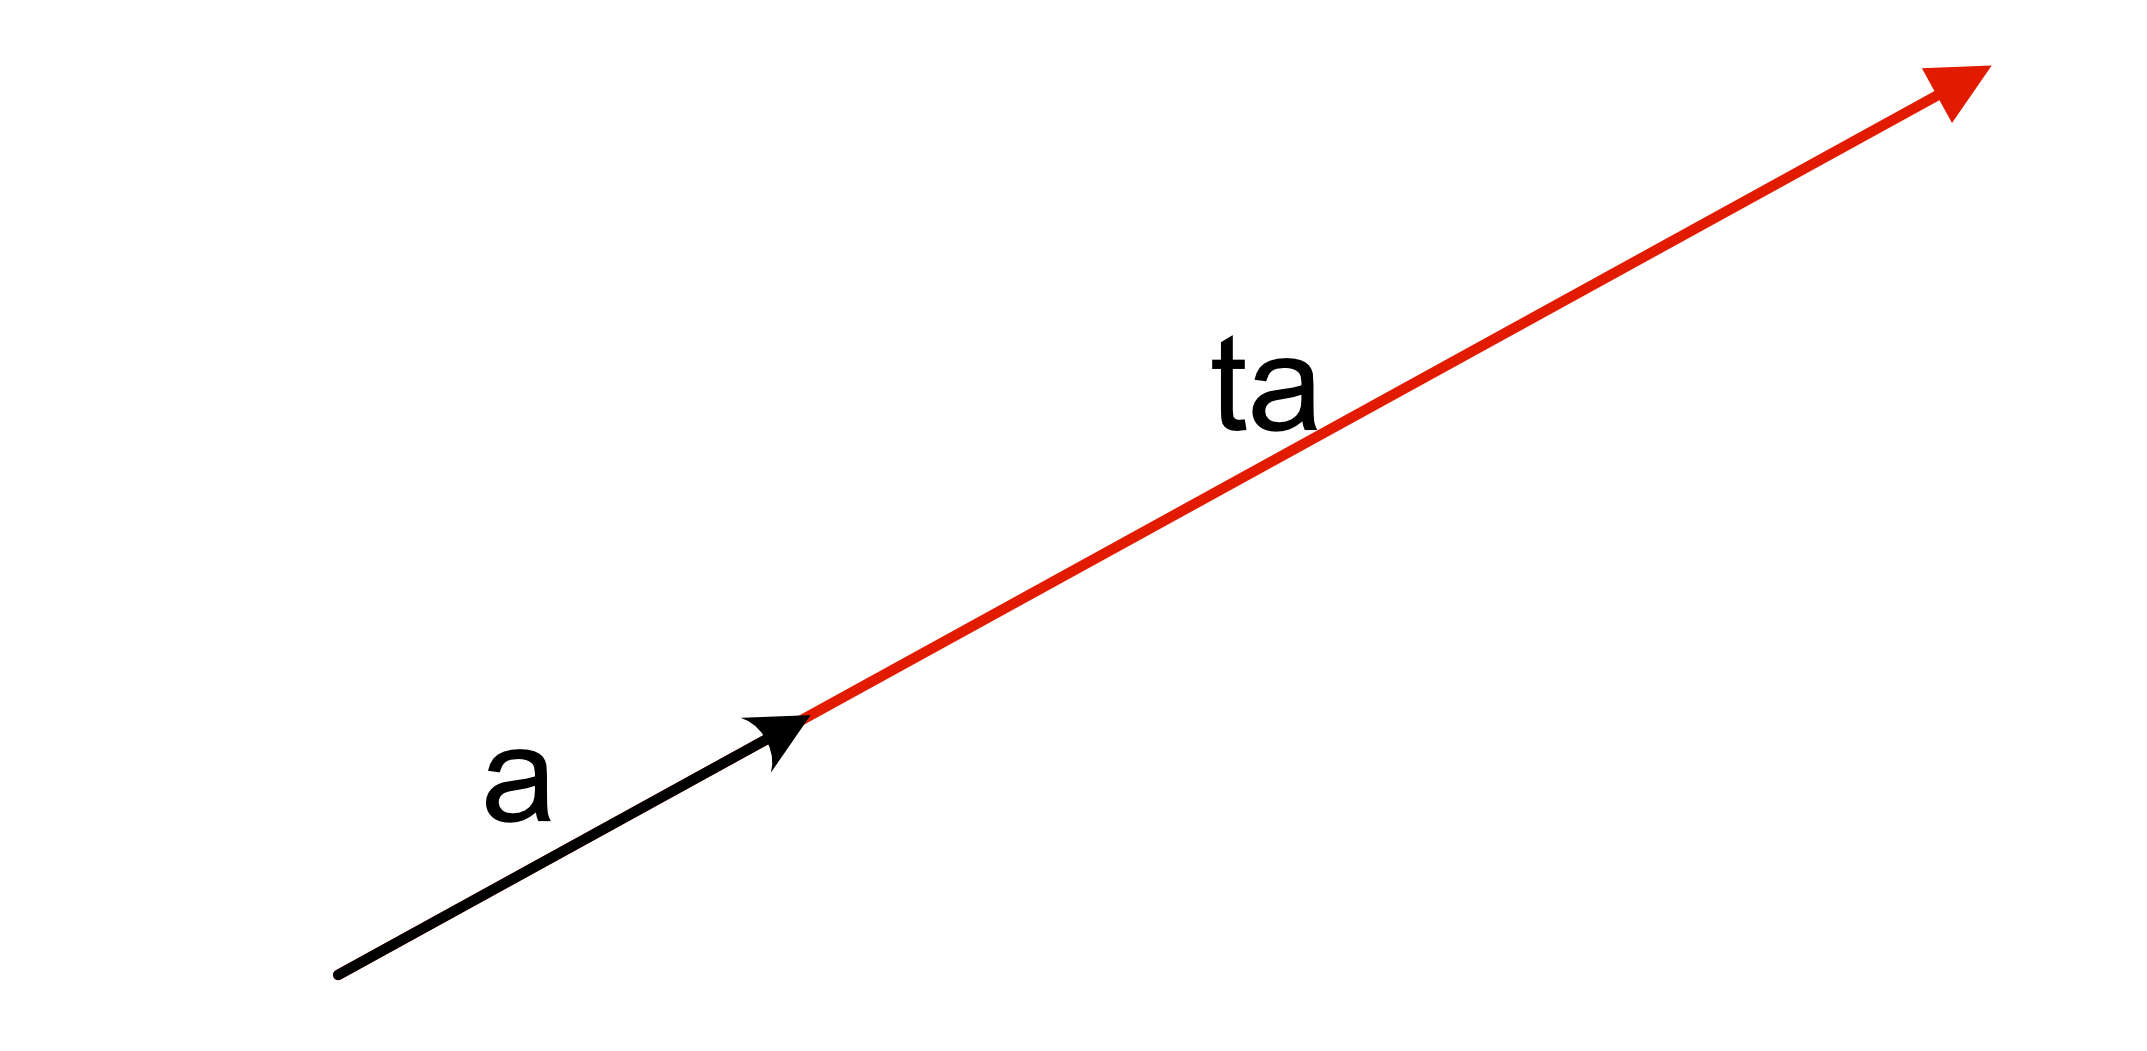

<figcaption class="figure-caption has-text-centered">Figure 1</figcaption>
</figure>
</div>
## Projections
Recall from the reading material that an orthogonal projection is a transformation that maps vectors onto a subspace in such that the distances between original and projected points are minimal. 
**Example**
Define a set of points 

$$
X = \begin{bmatrix}
\,|\, &        & \,|\, \\
x_1 & \cdots  & x_n \\
\,|\, &        & \,|\, \\
\end{bmatrix} \in \mathbb{R}^{2 \times n}
\quad (\text{`points` in the code})
$$
and
$$
\mathbf{a}
$$

describes a line given by the function $f(x)=0.5x$. The following example will project $X$ onto $\mathbf{a}$:




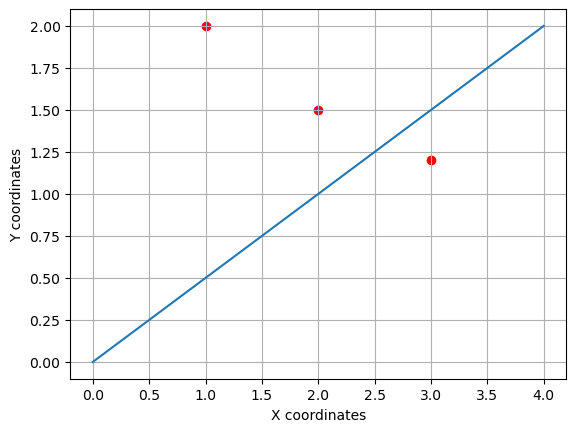

In [107]:
# Three points
X = np.array([
    [1, 2],
    [2, 1.5],
    [3, 1.2]
]).T

# Show plot
plt.scatter(X[0, :], X[1, :], c="r")

# Make line points (remember Numpy broadcasting)
x = np.linspace(0, 4)
f_x = x * 0.5

# Plot line
# Add grid lines
plt.grid(True)
plt.plot(x, f_x)
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
plt.show()

A point $x_i$ is projected onto the vector $\mathbf{a}$ by multiplying $Px_i$ where $P$ is the projection matrix. Projecting all points in $X$ onto the vector $\mathbf{a}$ is therefore $X^{\prime}=PX$.
The projection matrix $P$ is given by:

$$
P = A(A^TA)^{-1}A^T,
$$
where $A=\mathbf{a}$ (is a column vector).

**Info**
- The columns of $A$ span the subspace we want to project the point $x^{\prime}_i$ onto.
- The design matrix for the line is one-dimensional 


The code cell below calculates $P$ and projects $X$ onto $\mathbf{a}$:


In [108]:
##1
#The line l written as the design matrix
A = np.array([[1, 0.5]]).T  #  has to be a column vector

##2
## construct projection matrix
P = (A @ np.linalg.inv(A.T @ A)) @ A.T
print("P:\n", P)

PPX = P @ P @ X

print("PPX:\n", PPX)

#projection the points with matrix multiplication
x_prime = P @ X
print("projected points:\n", x_prime)
print("X:\n", X)

P:
 [[0.8 0.4]
 [0.4 0.2]]
PPX:
 [[1.6  2.2  2.88]
 [0.8  1.1  1.44]]
projected points:
 [[1.6  2.2  2.88]
 [0.8  1.1  1.44]]
X:
 [[1.  2.  3. ]
 [2.  1.5 1.2]]


The projection process is visualized below:


Text(0, 0.5, 'Y coordinates')

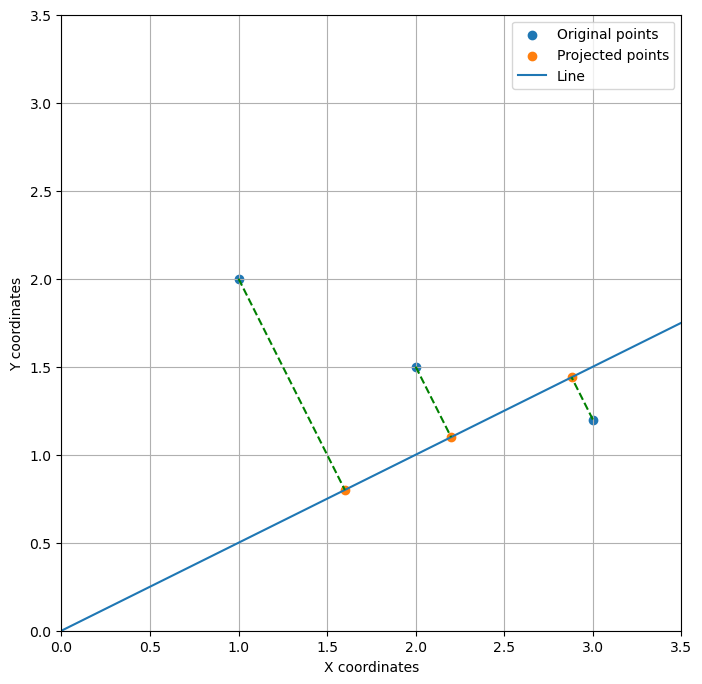

In [109]:
# Creating a square figure (makes it easier to visually confirm projection)
plt.figure(figsize=(8, 8))

plt.scatter(X[0, :], X[1, :], label="Original points")  # Old points
plt.scatter(x_prime[0, :], x_prime[1, :], label="Projected points")  # Projected points
plt.plot(x, f_x, label="Line")  # Line
plt.legend()

# Gather old and projected points in a single array
P1 = np.concatenate([X.T[:, :].reshape(1, 3, 2), x_prime.T[:, :].reshape(1, 3, 2)], axis=0)
# Plot projection/error lines
plt.plot(P1[:, 0, 0], P1[:, 0, 1], 'g--')
plt.plot(P1[:, 1, 0], P1[:, 1, 1], 'g--')
plt.plot(P1[:, 2, 0], P1[:, 2, 1], 'g--')
# Add grid lines
plt.grid(True)
# Set axes limits to be the same for equal aspect ratio
plt.xlim(0, 3.5)
plt.ylim(0, 3.5)
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")


**Observe**
The projection lines (dashed lines) and the vector $\mathbf{a}$ are orthogonal.

## Linear Least Squares
This tutorial is about fitting a straight line (model) to a set of points (matrix $X$). The goal is to find the line that minimizes the error between the actual points and the points predicted by the model. 


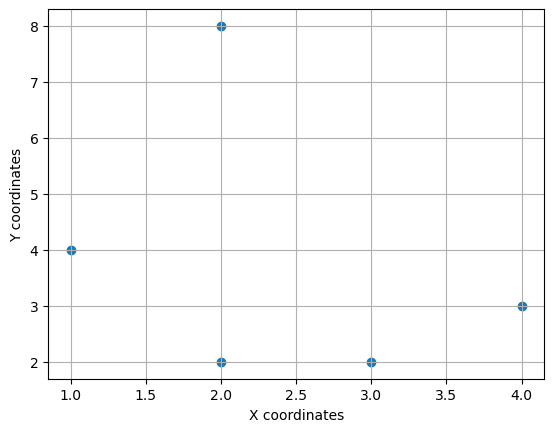

In [110]:
## 3
# Define the example points
X = np.array([
    [1, 4],
    [2, 2],
    [3, 2],
    [4, 3],
    [2, 8]
]).T

plt.grid(True)
plt.scatter(X[0, :], X[1, :])
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
# Display the plot
plt.show()

In the previous section, the set of points were projected onto an existing line. In this section, projections are used to perform linear least squares to find model parameters. The model is $f_\mathbf{w}(x) = y = \mathbf{w}_1x + \mathbf{w}_2$, where $x$ is the input and $\mathbf{w}_1$, $\mathbf{w}_2$ are the parameters. The model can be expressed as an inner product $f_\mathbf{w}(x) = y = \begin{bmatrix}x& 1\end{bmatrix}\mathbf{w}$.
With multiple points, a linear set of equations is given by

$$
\begin{bmatrix}x_1 & 1\\\vdots & \vdots \\x_n&1\end{bmatrix} \mathbf{w} = A\mathbf{w} = \mathbf{y} = \begin{bmatrix}y_1\\ \vdots \\y_n\end{bmatrix}.
$$
Two points are necessary to solve for the model parameters using inverses ($A$ is square). When the set of points $X$ contains more than two points, a linear least squares solution for $\mathbf{w}$ is needed. 

**Info**
Try to visualize placing one line in the figure above that intersects all points. This is clearly impossible! However, if the points $X$ were all on the same line, an exact solution could be found since the rows of $X$ are linearly dependent ($X$ can be rewritten as a square matrix and as a result, $A$ becomes square). 

A least squares solution implies that there will be some error between  $\mathbf{y}$ and the predicted points $\mathbf{\hat{y}}=A\mathbf{w}$. Additionally, $\mathbf{\hat{y}}$ must be in the span of $A$ since it is a linear combination of its column vectors. This is visualized for two dimensions in [Figure 2](#lstsq). Observe that $\mathbf{\hat{y}}$ in the figure must be on the line spanned by $A$.
<div class="has-text-centered">
<figure class="image is-inline-block" id="lstsq">

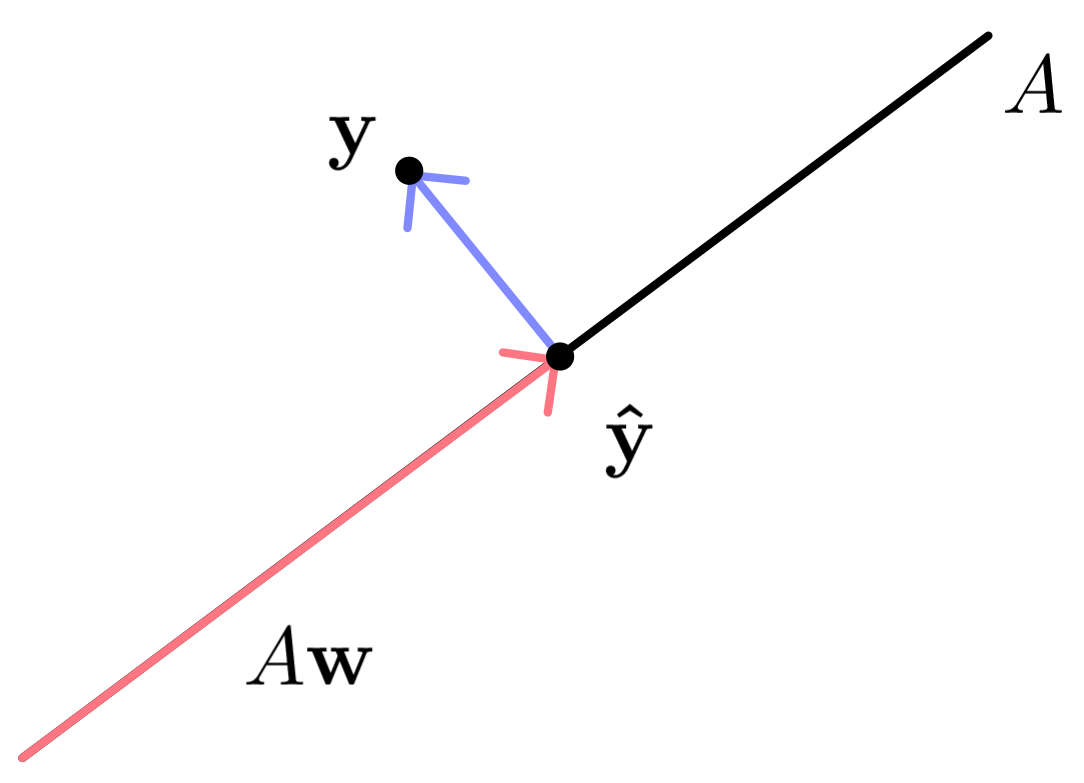

<figcaption class="figure-caption has-text-centered">Figure 2: Least squares demonstrations using a two-dimensional design matrix. It visualizes how $\mathbf{\hat{y} }$ is the projection of $\mathbf{y}$ onto $A$ and that $\mathbf{\hat{y} }=A\mathbf{w}$. It also shows the error vector $e$.
</figcaption>
</figure>
</div>
Minimizing the error is done by projecting $\mathbb{y}$ onto $A$ as demonstrated for two dimensions in [Figure 2](#lstsq). This reveals the relation $\mathbf{\hat{y}} = P\mathbf{y}$ and hence $A\mathbf{w} = P \mathbf{y}=A(A^\top A)^{-1}A^\top \mathbf{y}$. 
The final step is solving for $\mathbf{w}$. Since $A$ is multiplied on both sides, isolating $\mathbf{w}$ yields:

$$
\mathbf{w} = (A^\top A)^{-1}A^\top \mathbf{y}.
$$


**Derivation (optional)**
The exact derivation requires a few extra steps and is not expected knowledge for the exam. However, we include it here for those who want to convince themselves that the solution for $\mathbf{w}$ is indeed correct:

$$\begin{align*}
\mathbf{\hat{y}} & = P\mathbf{y} &\\
A\mathbf{w} & = A(A^TA)^{-1}A^T \mathbf{y} & \text{Substitute }\mathbf{\hat{y}}=A\mathbf{w}\text{ and }P=A(A^TA)^{-1}A^T\\
(A^TA)^{-1}A^TA\mathbf{w} & = (A^TA)^{-1}A^TA(A^TA)^{-1}A^T \mathbf{y} & \text{Multiply both sides by }(A^TA)^{-1}\\
\mathbf{w} & = (A^TA)^{-1}A^T \mathbf{y} & \text{Simplify using the fact that }(A^TA)^{-1}A^TA=I\\
\end{align*}$$


Define matrix $A$ with the following columns:


In [111]:
x_vals = X[0, :]
y_vals = X[1, :]

A = np.vstack((x_vals, np.ones(x_vals.shape))).T
print("A\n", A)

A
 [[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [2. 1.]]


### Projection
The following cell implements the solution for $\mathbf{w}$ described above:


In [112]:
P = np.linalg.inv(A.T @ A) @ A.T
# Applying the transformation
w = P @ y_vals
print("w:", w)

w: [-0.69230769  5.46153846]


To get the predicted points $\mathbf{\hat{y}}$, $A$ is multiplied onto the parameter vector:


In [113]:
# Calculating the projected y-values
y_hat = A @ w

The `w`
 vector is of the form $(a, b)$ and the line formula is $f(x)=ax+b$. Below, we calculate a number of points on the line for visualization purposes and compare with both the original and projected points:


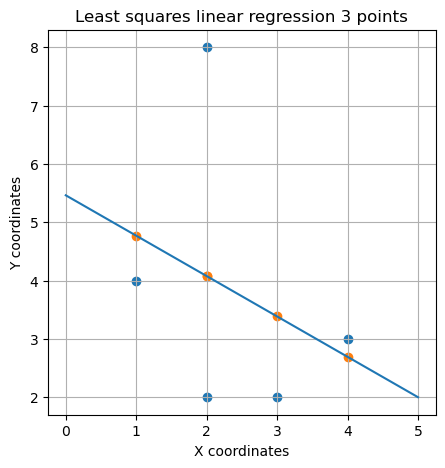

In [114]:
x = np.linspace(0, 5)  # Create range of values
y = x * w[0] + w[1]  # Calculate f(x)

plt.figure(figsize=(5, 5))

plt.plot(x, y)  # Plot line
plt.scatter(X[0, :], X[1, :])  # Plot original points

plt.scatter(X[0, :], y_hat)  # Plot the points
plt.title('Least squares linear regression 3 points')
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
plt.grid(True)
plt.show()

### Measuring the error
$\mathbf{y}$ and $\mathbf{\hat{y}}$ are both vectors. The projection error is:

$$
e = \|\mathbf{y}-\mathbf{\hat{y}}\| = \sqrt{\sum_{i=1}^n (y_i - \hat{y}_i)^2} = \sqrt{(\mathbf{y}-\mathbf{\hat{y}})(\mathbf{y}-\mathbf{\hat{y}})^\top}.
$$


In [115]:
# Calculating the error
diff = y_vals - y_hat
e = np.sqrt(diff @ diff.T)
print("e", e)

e 4.723101979387308


To get the mean error, we use

$$
RMS(\mathbf{y}, \mathbf{\hat{y}}) = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2} = \sqrt{\frac{1}{n}(\mathbf{y}-\mathbf{\hat{y}})(\mathbf{y}-\mathbf{\hat{y}})^\top}.
$$


In [116]:
diff = y_vals - y_hat
rms = np.sqrt((diff @ diff.T).mean())
print("root mean squared error", rms)

root mean squared error 4.723101979387308
